In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from utils import percentile

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_0_40 = pd.read_csv('models_1type_all/day/sample_data_day_0to40.csv')
df_40_80 = pd.read_csv('models_1type_all/day/sample_data_day_40to80.csv')
df_80_120 = pd.read_csv('models_1type_all/day/sample_data_day_80to120.csv')
df_120_160 = pd.read_csv('models_1type_all/day/sample_data_day_120to160.csv')
df_160_end = pd.read_csv('models_1type_all/day/sample_data_day_160to_end.csv')
sample_data_day = df_0_40.append([df_40_80, df_80_120, df_120_160, df_160_end])
sample_data_day.reset_index(inplace=True, drop=True)
sample_data_day

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,5606,2834,0.402871,0.020062,0.696300,log-log,0.402871,3.0,9,10,SKU|Store,SKU|Store|Day
1,5606,2834,1.103667,0.291782,0.013946,log-log,1.103667,3.0,18,20,SKU|Store,SKU|Store|Day
2,5606,2834,0.511371,0.039756,0.290807,log-log,0.511371,8.0,23,30,SKU|Store,SKU|Store|Day
3,5606,2834,0.157428,0.002852,0.743474,log-log,0.157428,12.0,31,40,SKU|Store,SKU|Store|Day
4,5606,2834,-0.414055,0.036659,0.182868,log-log,-0.414055,6.0,34,50,SKU|Store,SKU|Store|Day
...,...,...,...,...,...,...,...,...,...,...,...,...
2959862,323962,2230,0.031880,0.000000,0.179864,log-log,0.031880,3.0,1,10,SKU|Store,SKU|Store|Day
2959863,148636,1507,-1.522126,0.915080,0.000015,log-log,-1.522126,6.0,4,10,SKU|Store,SKU|Store|Day
2959864,320777,2862,-0.328967,0.047619,0.544737,log-log,-0.328967,2.0,2,10,SKU|Store,SKU|Store|Day
2959865,228911,1140,0.011243,0.000000,0.343436,log-log,0.011243,1.0,1,10,SKU|Store,SKU|Store|Day


In [3]:
df_0_40 = pd.read_csv('models_1type_all/week/sample_data_week_0to40.csv')
df_40_80 = pd.read_csv('models_1type_all/week/sample_data_week_40to80.csv')
df_80_120 = pd.read_csv('models_1type_all/week/sample_data_week_80to120.csv')
df_120_160 = pd.read_csv('models_1type_all/week/sample_data_week_120to160.csv')
df_160_end = pd.read_csv('models_1type_all/week/sample_data_week_160to_end.csv')
sample_data_week = df_0_40.append([df_40_80, df_80_120, df_120_160, df_160_end])
sample_data_week.reset_index(inplace=True, drop=True)
sample_data_week

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,10220,2834,4.813843,0.109437,0.350478,log-log,4.813843,8.428571,8,10,SKU|Store,SKU|Store|Week
1,10220,2834,0.805560,0.006787,0.729871,log-log,0.805560,11.380952,10,20,SKU|Store,SKU|Store|Week
2,10220,2834,4.304209,0.228868,0.007492,log-log,4.304209,16.476190,13,30,SKU|Store,SKU|Store|Week
3,10220,2834,7.727542,0.346266,0.000065,log-log,7.727542,30.523810,12,40,SKU|Store,SKU|Store|Week
4,10220,2834,6.576937,0.296864,0.000043,log-log,6.576937,35.095238,14,50,SKU|Store,SKU|Store|Week
...,...,...,...,...,...,...,...,...,...,...,...,...
2196057,284053,1133,0.005851,0.000000,0.182603,log-log,0.005851,0.392857,1,10,SKU|Store,SKU|Store|Week
2196058,320038,2853,-0.088345,0.183847,0.216306,log-log,-0.088345,0.142857,7,10,SKU|Store,SKU|Store|Week
2196059,320372,1117,0.353601,0.089501,0.401066,log-log,0.353601,0.166667,6,10,SKU|Store,SKU|Store|Week
2196060,296002,1102,-6.528607,0.081284,0.424604,log-log,-6.528607,31.285714,3,10,SKU|Store,SKU|Store|Week


In [4]:
Y = ['Coefficient', 'R-squared', 'Elasticity']

In [5]:
# for y in Y:
#     fig, ax = plt.subplots()
#     ax.bar(x=sample_data_day['SampleSize'], height=sample_data_day[y], 
#            width=8, color='dodgerblue', alpha=0.3)
#     plt.xlim([0, 1050])      #  диапазон оси x
#     fig.set_figwidth(30)    #  ширина Figure
#     fig.set_figheight(6)    #  высота Figure
#     plt.xticks([x for x in range(10, 110, 10)] + [x for x in range(200, 1050, 100)])
#     plt.grid() # сетка
    
#     plt.xlabel('SampleSize')
#     plt.ylabel(y)
#     plt.title('График зависимости ' + y + ' от SampleSize определенного Store|SKU|Day')
    
#     plt.show()

In [6]:
# for y in Y:
#     fig, ax = plt.subplots()
#     ax.bar(x=sample_data_week['SampleSize'], height=sample_data_week[y], 
#            width=3, color='dodgerblue', alpha=0.3)
#     #plt.xlim([0, 13])      #  диапазон оси x
#     fig.set_figwidth(12)    #  ширина Figure
#     fig.set_figheight(6)    #  высота Figure
#     plt.xticks(week_sample_size)
#     plt.grid() # сетка
    
#     plt.xlabel('SampleSize')
#     plt.ylabel(y)
#     plt.title('График зависимости ' + y + ' от SampleSize определенного Store|SKU|Week')
    
#     plt.show()

# Подсчет адекватных значений

In [7]:
#адекватные значения
min_elast, max_elast = -10, 0
p_value = 0.05

In [8]:
#считаем адекватные значения для SKU_id|Day
sample_data_day['flag_AE'] = ((sample_data_day.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_day.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_day['flag_R&AE'] = ((sample_data_day['flag_AE']) &
                                               (sample_data_day.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [9]:
#считаем адекватные значения для SKU_id|Week
sample_data_week['flag_AE'] = ((sample_data_week.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_week.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_week['flag_R&AE'] = ((sample_data_week['flag_AE']) &
                                               (sample_data_week.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [10]:
#для подсчета средневзвешенного значения по qty
sample_data_day['QTY_AE_day'] = sample_data_day['Qty'] * sample_data_day['flag_AE']
sample_data_day['QTY_R&AE_day'] = sample_data_day['Qty'] * sample_data_day['flag_R&AE']

In [11]:
sample_data_day

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_day,QTY_R&AE_day
0,5606,2834,0.402871,0.020062,0.696300,log-log,0.402871,3.0,9,10,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
1,5606,2834,1.103667,0.291782,0.013946,log-log,1.103667,3.0,18,20,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
2,5606,2834,0.511371,0.039756,0.290807,log-log,0.511371,8.0,23,30,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
3,5606,2834,0.157428,0.002852,0.743474,log-log,0.157428,12.0,31,40,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
4,5606,2834,-0.414055,0.036659,0.182868,log-log,-0.414055,6.0,34,50,SKU|Store,SKU|Store|Day,1,0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959862,323962,2230,0.031880,0.000000,0.179864,log-log,0.031880,3.0,1,10,SKU|Store,SKU|Store|Day,0,0,0.0,0.0
2959863,148636,1507,-1.522126,0.915080,0.000015,log-log,-1.522126,6.0,4,10,SKU|Store,SKU|Store|Day,1,1,6.0,6.0
2959864,320777,2862,-0.328967,0.047619,0.544737,log-log,-0.328967,2.0,2,10,SKU|Store,SKU|Store|Day,1,0,2.0,0.0
2959865,228911,1140,0.011243,0.000000,0.343436,log-log,0.011243,1.0,1,10,SKU|Store,SKU|Store|Day,0,0,0.0,0.0


In [12]:
#для подсчета средневзвешенного значения по qty
sample_data_week['QTY_AE_week'] = sample_data_week['Qty'] * sample_data_week['flag_AE']
sample_data_week['QTY_R&AE_week'] = sample_data_week['Qty'] * sample_data_week['flag_R&AE']

In [13]:
sample_data_week

,SKU,Store,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_week,QTY_R&AE_week
0,10220,2834,4.813843,0.109437,0.350478,log-log,4.813843,8.428571,8,10,SKU|Store,SKU|Store|Week,0,0,0.000000,0.0
1,10220,2834,0.805560,0.006787,0.729871,log-log,0.805560,11.380952,10,20,SKU|Store,SKU|Store|Week,0,0,0.000000,0.0
2,10220,2834,4.304209,0.228868,0.007492,log-log,4.304209,16.476190,13,30,SKU|Store,SKU|Store|Week,0,0,0.000000,0.0
3,10220,2834,7.727542,0.346266,0.000065,log-log,7.727542,30.523810,12,40,SKU|Store,SKU|Store|Week,0,0,0.000000,0.0
4,10220,2834,6.576937,0.296864,0.000043,log-log,6.576937,35.095238,14,50,SKU|Store,SKU|Store|Week,0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196057,284053,1133,0.005851,0.000000,0.182603,log-log,0.005851,0.392857,1,10,SKU|Store,SKU|Store|Week,0,0,0.000000,0.0
2196058,320038,2853,-0.088345,0.183847,0.216306,log-log,-0.088345,0.142857,7,10,SKU|Store,SKU|Store|Week,1,0,0.142857,0.0
2196059,320372,1117,0.353601,0.089501,0.401066,log-log,0.353601,0.166667,6,10,SKU|Store,SKU|Store|Week,0,0,0.000000,0.0
2196060,296002,1102,-6.528607,0.081284,0.424604,log-log,-6.528607,31.285714,3,10,SKU|Store,SKU|Store|Week,1,0,31.285714,0.0


## lim elas

In [14]:
lim_elast = sample_data_day[['Elasticity', 'SKU', 'Store']][sample_data_day['SampleSize'] == 1000]
lim_elast.rename(columns={'Elasticity' : 'lim_elas'}, inplace=True)
lim_elast

,lim_elas,SKU,Store
18,0.651361,5606,2834
37,2.421571,13316,2834
56,1.352340,3414,2834
75,-0.007348,4404,2834
94,0.667773,1823,2834
...,...,...,...
2637677,-0.211640,145864,1136
2637692,-0.071177,146047,1111
2637710,-0.574656,325632,1108
2637729,-0.135678,145864,1084


In [15]:
sample_data_day_lim = sample_data_day.merge(lim_elast, how='outer', left_on=['SKU', 'Store'], right_on=['SKU', 'Store'])
sample_data_day_lim.dropna(inplace=True)

In [16]:
sample_data_day_lim['diff_elas'] = abs(sample_data_day_lim['Elasticity'] - sample_data_day_lim['lim_elas'])
sample_data_day_lim['rel_diff_elas'] = abs(sample_data_day_lim['Elasticity'] - sample_data_day_lim['lim_elas']) / abs(sample_data_day_lim['lim_elas'])

In [17]:
lim_elas = sample_data_day_lim[['SampleSize', 'diff_elas', 'rel_diff_elas']].groupby('SampleSize').agg({'median', percentile(25), percentile(75)})
lim_elas

diff_elas                     rel_diff_elas                    
              pctl75    median    pctl25        pctl75    median    pctl25
SampleSize                                                                
10          1.365315  0.657557  0.285179      2.494353  1.072748  0.431540
20          0.776901  0.371937  0.156508      1.573656  0.700036  0.300676
30          0.599617  0.282098  0.116110      1.287507  0.581461  0.250623
40          0.491969  0.230593  0.095155      1.092965  0.506654  0.223019
50          0.430583  0.199299  0.081342      0.980582  0.459277  0.197303
60          0.384681  0.177660  0.072302      0.895233  0.423787  0.184890
70          0.351479  0.162176  0.065644      0.827735  0.395778  0.169657
80          0.323018  0.147159  0.059412      0.781812  0.370851  0.157846
90          0.303938  0.140483  0.056619      0.747877  0.354731  0.151683
100         0.281600  0.128493  0.051126      0.704385  0.329689  0.141725
200         0.183568  0.082452  0.032344      0.501132  0.232642  0.097056
300         0.140332  0.062323  0.024210      0.393664  0.178483  0.076349
400         0.112330  0.049785  0.019140      0.322931  0.145155  0.062113
500         0.091767  0.041455  0.015829      0.274251  0.121072  0.051068
600         0.076729  0.033871  0.012605      0.222164  0.100727  0.042565
700         0.062912  0.027758  0.010360      0.188593  0.083449  0.035453
800         0.050760  0.021882  0.008170      0.153309  0.066571  0.028340
900         0.038478  0.016461  0.006007      0.108745  0.050206  0.021378
1000        0.000000  0.000000  0.000000      0.000000  0.000000  0.000000

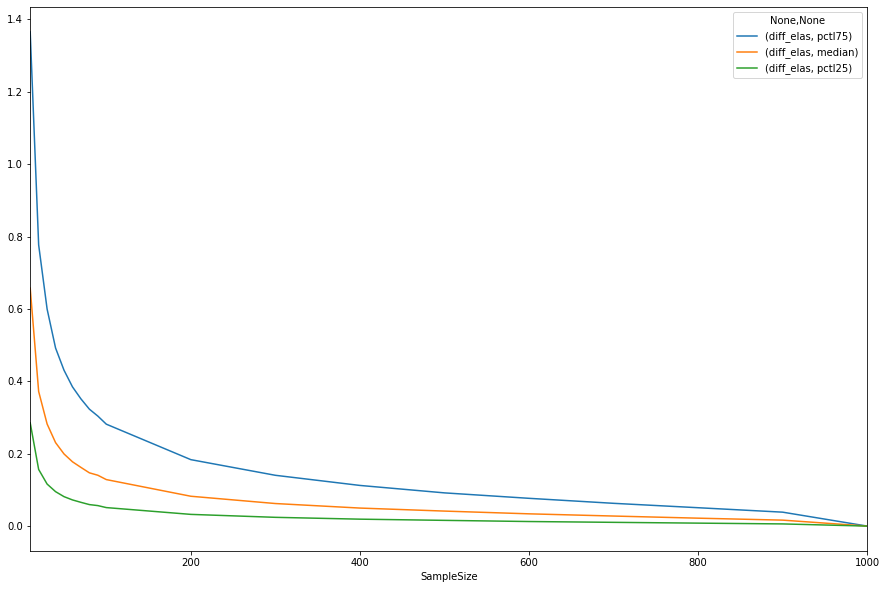

In [18]:
lim_elas.reset_index(inplace=True)
lim_elas[['SampleSize', 'diff_elas']].plot(figsize=(15, 10), x='SampleSize', y=['diff_elas', 'rel_diff_elas'])

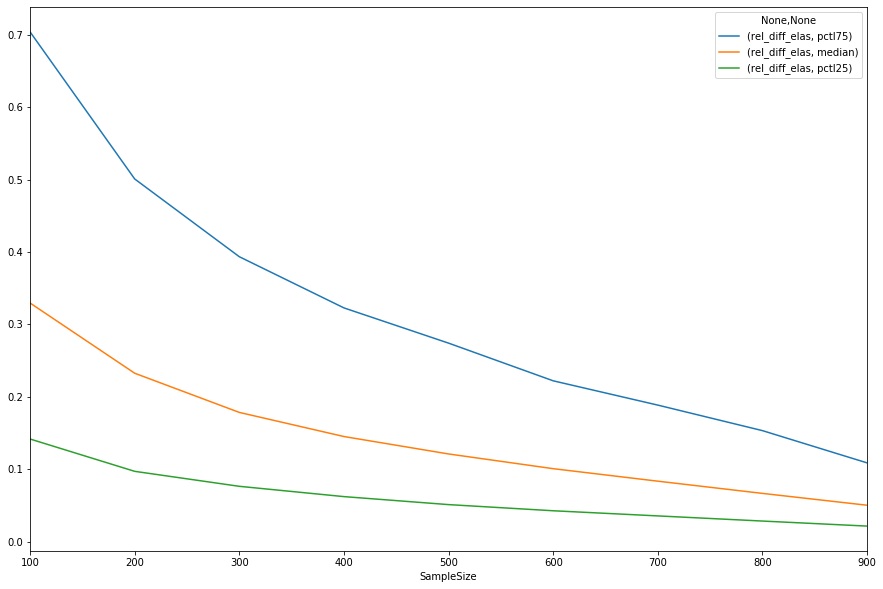

In [19]:
lim_elas[['SampleSize', 'rel_diff_elas']].tail(10).head(9).plot(figsize=(15, 10), x='SampleSize', y=['diff_elas', 'rel_diff_elas'])

## Зависимость свойств PED модели от количества различных значений цен

### Day

In [20]:
adeq_day_prices = sample_data_day.groupby(['SampleSize', 'Num_diff_prices']).agg({'mean', 'count'})

adeq_day_prices.reset_index(inplace=True)
adeq_day_prices = adeq_day_prices[adeq_day_prices['SampleSize'] == 1000]
adeq_day_prices = adeq_day_prices[adeq_day_prices[('SKU', 'count')] > 0]

adeq_day_prices.rename(columns={'flag_AE' : '%#_AE_day',
                          'flag_R&AE' : '%#_R&AE_day'}, level=0 , inplace=True)
#для подсчета ср. взвеш.
adeq_day_prices['%QTY_AE_day'] = adeq_day_prices[('QTY_AE_day', 'mean')] / adeq_day_prices[('Qty', 'mean')]
adeq_day_prices['%QTY_R&AE_day'] = adeq_day_prices[('QTY_R&AE_day', 'mean')] / adeq_day_prices[('Qty', 'mean')]

In [21]:
adeq_day_prices

SampleSize Num_diff_prices            SKU              Store        \
                                          mean count         mean count   
1908       1000               3  142377.000000     4  1093.750000     4   
1909       1000               4  131544.000000    46  1125.891304    46   
1910       1000               5  123062.750000    88  1136.340909    88   
1911       1000               6   91356.536082    97  1131.175258    97   
1912       1000               7   86593.194313   211  1121.962085   211   
...         ...             ...            ...   ...          ...   ...   
2135       1000             296  123810.000000     1  2834.000000     1   
2136       1000             314   15101.000000     1  2834.000000     1   
2137       1000             331   10430.000000     1  2834.000000     1   
2138       1000             388  112050.000000     1  2834.000000     1   
2139       1000             389   92424.000000     1  2834.000000     1   

     Coefficient       R-squared        ... %#_AE_day       %#_R&AE_day        \
            mean count      mean count  ...      mean count        mean count   
1908    4.411269     4  0.056851     4  ...  0.000000     4    0.000000     4   
1909    2.200672    46  0.037127    46  ...  0.326087    46    0.173913    46   
1910    0.323552    88  0.023267    88  ...  0.715909    88    0.454545    88   
1911   -0.805082    97  0.031569    97  ...  0.886598    97    0.577320    97   
1912   -0.671754   211  0.024119   211  ...  0.895735   211    0.597156   211   
...          ...   ...       ...   ...  ...       ...   ...         ...   ...   
2135   -2.401625     1  0.060964     1  ...  1.000000     1    1.000000     1   
2136    1.545902     1  0.037963     1  ...  0.000000     1    0.000000     1   
2137    0.741239     1  0.032304     1  ...  0.000000     1    0.000000     1   
2138    0.029266     1  0.000021     1  ...  0.000000     1    0.000000     1   
2139   -1.604372     1  0.050749     1  ...  1.000000     1    1.000000     1   

       QTY_AE_day       QTY_R&AE_day       %QTY_AE_day %QTY_R&AE_day  
             mean count         mean count                            
1908     0.000000     4     0.000000     4    0.000000      0.000000  
1909    30.804348    46    20.000000    46    0.042467      0.027572  
1910   398.105000    88   304.434545    88    0.612413      0.468318  
1911  1021.388454    97  1004.378144    97    0.930509      0.915012  
1912   635.673744   211   614.583697   211    0.975444      0.943081  
...           ...   ...          ...   ...         ...           ...  
2135  1136.000000     1  1136.000000     1    1.000000      1.000000  
2136     0.000000     1     0.000000     1    0.000000      0.000000  
2137     0.000000     1     0.000000     1    0.000000      0.000000  
2138     0.000000     1     0.000000     1    0.000000      0.000000  
2139  1028.000000     1  1028.000000     1    1.000000      1.000000  

[232 rows x 26 columns]

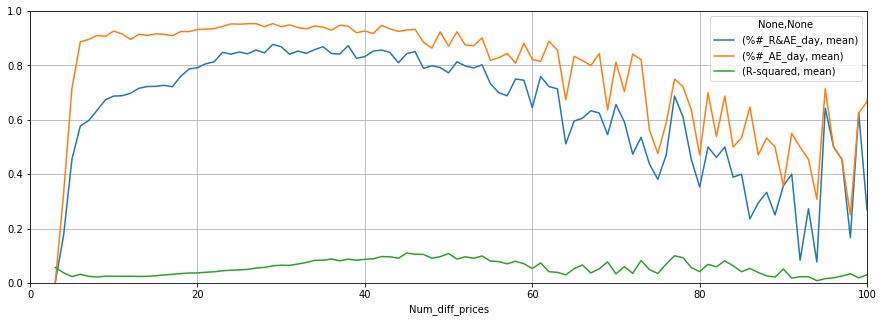

In [22]:
adeq_day_prices[[('%#_R&AE_day', 'mean'), ('%#_AE_day', 'mean'), 
                 ('Num_diff_prices', ''), ('R-squared', 'mean')]].plot(figsize=(15, 5), x='Num_diff_prices', ylim=[0, 1], xlim=[0.0, 100], grid=True)

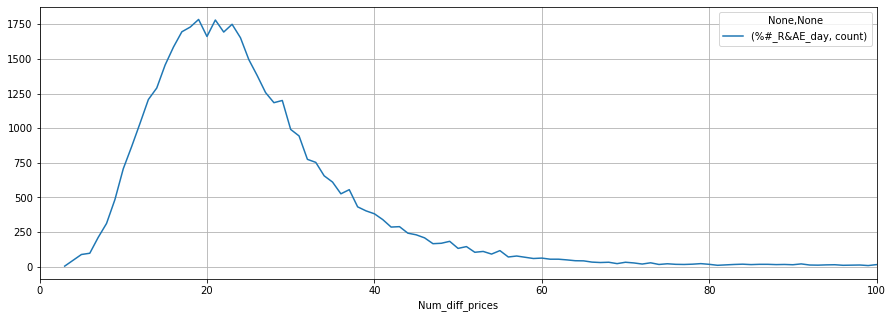

In [23]:
adeq_day_prices[[('%#_R&AE_day', 'count'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', xlim=[0.0, 100], grid=True)

### Week

In [24]:
adeq_week_prices = sample_data_week.groupby(['SampleSize', 'Num_diff_prices']).agg({'mean', 'count'})

adeq_week_prices.reset_index(inplace=True)
adeq_week_prices = adeq_week_prices[adeq_week_prices['SampleSize'] == 150]
adeq_week_prices = adeq_week_prices[adeq_week_prices[('SKU', 'count')] > 0]

adeq_week_prices.rename(columns={'flag_AE' : '%#_AE_week',
                          'flag_R&AE' : '%#_R&AE_week'}, level=0 , inplace=True)
#для подсчета ср. взвеш.
adeq_week_prices['%QTY_AE_week'] = adeq_week_prices[('QTY_AE_week', 'mean')] / adeq_week_prices[('Qty', 'mean')]
adeq_week_prices['%QTY_R&AE_week'] = adeq_week_prices[('QTY_R&AE_week', 'mean')] / adeq_week_prices[('Qty', 'mean')]

In [25]:
adeq_week_prices

SampleSize Num_diff_prices            SKU              Store        \
                                          mean count         mean count   
952         150               3   56163.000000     2  1967.000000     2   
953         150               4  102747.473684    19  1196.368421    19   
954         150               5  118952.476190    42  1140.428571    42   
955         150               6  107990.584270    89  1186.393258    89   
956         150               7   87539.378882   161  1123.913043   161   
...         ...             ...            ...   ...          ...   ...   
1070        150             122  107297.000000     1  2834.000000     1   
1071        150             127   10828.333333     3  2258.666667     3   
1072        150             129   64756.000000     2  2834.000000     2   
1073        150             130  108117.000000     2  2834.000000     2   
1074        150             133   10430.000000     1  2834.000000     1   

     Coefficient       R-squared        ... %#_AE_week       %#_R&AE_week  \
            mean count      mean count  ...       mean count         mean   
952    -1.883461     2  0.147801     2  ...   1.000000     2     0.500000   
953     1.071752    19  0.056535    19  ...   0.526316    19     0.210526   
954     1.773938    42  0.086103    42  ...   0.476190    42     0.238095   
955     0.022859    89  0.083644    89  ...   0.640449    89     0.438202   
956    -0.983336   161  0.097809   161  ...   0.863354   161     0.689441   
...          ...   ...       ...   ...  ...        ...   ...          ...   
1070    3.111830     1  0.220270     1  ...   0.000000     1     0.000000   
1071    0.911849     3  0.079772     3  ...   0.333333     3     0.000000   
1072    0.368708     2  0.008889     2  ...   0.000000     2     0.000000   
1073   -1.672068     2  0.061888     2  ...   1.000000     2     0.500000   
1074    1.141412     1  0.158369     1  ...   0.000000     1     0.000000   

           QTY_AE_week       QTY_R&AE_week       %QTY_AE_week %QTY_R&AE_week  
     count        mean count          mean count                              
952      2   75.547381     2     24.916667     2     1.000000       0.329815  
953     19   47.373534    19     38.179674    19     0.360712       0.290708  
954     42   48.315748    42     28.739286    42     0.363721       0.216349  
955     89  150.547432    89    108.385329    89     0.710013       0.511168  
956    161  160.725188   161    135.513703   161     0.902072       0.760572  
...    ...         ...   ...           ...   ...          ...            ...  
1070     1    0.000000     1      0.000000     1     0.000000       0.000000  
1071     3  144.400571     3      0.000000     3     0.789914       0.000000  
1072     2    0.000000     2      0.000000     2     0.000000       0.000000  
1073     2  164.392857     2     86.154762     2     1.000000       0.524078  
1074     1    0.000000     1      0.000000     1     0.000000       0.000000  

[123 rows x 26 columns]

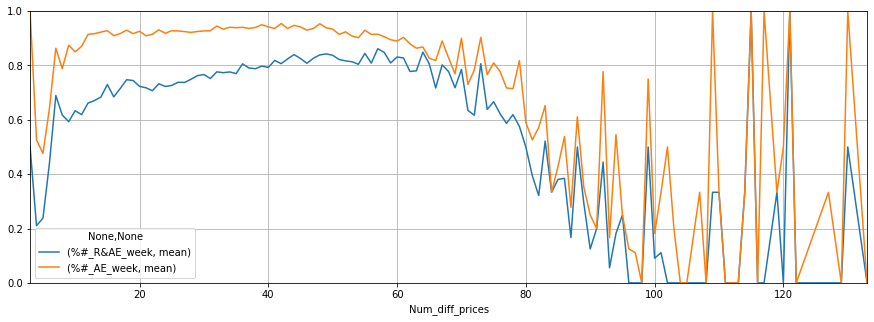

In [26]:
adeq_week_prices[[('%#_R&AE_week', 'mean'), ('%#_AE_week', 'mean'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', ylim=[0, 1], grid=True)

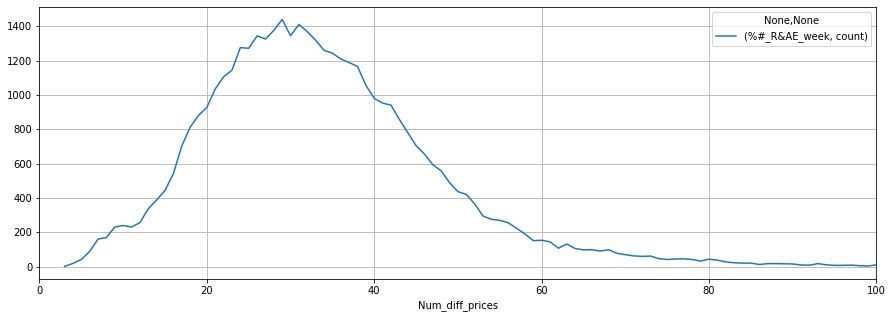

In [27]:
adeq_week_prices[[('%#_R&AE_week', 'count'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', xlim=[0.0, 100], grid=True)

## Зависимость свойств PED модели от SampleSize

In [28]:
adeq_day = sample_data_day.groupby(['SampleSize']).mean()

adeq_day.reset_index(inplace=True)

adeq_day.rename(columns={'flag_AE' : '%#_AE_day', 
                         'flag_R&AE' : '%#_R&AE_day'}, inplace=True)
adeq_day['%QTY_AE_day'] = adeq_day['QTY_AE_day'] / adeq_day['Qty']
adeq_day['%QTY_R&AE_day'] = adeq_day['QTY_R&AE_day'] / adeq_day['Qty']

columns_drop = ['SKU', 'Store', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_day', 'QTY_R&AE_day', 'Num_diff_prices']
adeq_day.drop(columns_drop, axis=1, inplace=True)

In [29]:
adeq_day

,SampleSize,Elasticity,Qty,%#_AE_day,%#_R&AE_day,%QTY_AE_day,%QTY_R&AE_day
0,10,-0.669292,5.059905,0.640626,0.050687,0.660156,0.102990
1,20,-0.526792,7.777904,0.668206,0.077481,0.711199,0.197470
2,30,-0.468041,10.363141,0.685234,0.099926,0.737420,0.261282
3,40,-0.433251,12.773120,0.695557,0.118096,0.751886,0.311890
4,50,-0.406756,15.198588,0.700738,0.135846,0.761452,0.355469
5,60,-0.389449,17.516950,0.706361,0.151610,0.774194,0.393167
6,70,-0.385759,19.838931,0.710382,0.166136,0.780417,0.419789
7,80,-0.381168,22.212205,0.715475,0.179672,0.784160,0.449981
8,90,-0.368187,24.427166,0.717426,0.191856,0.787032,0.469389
9,100,-0.348743,26.726558,0.721423,0.202598,0.791754,0.488431


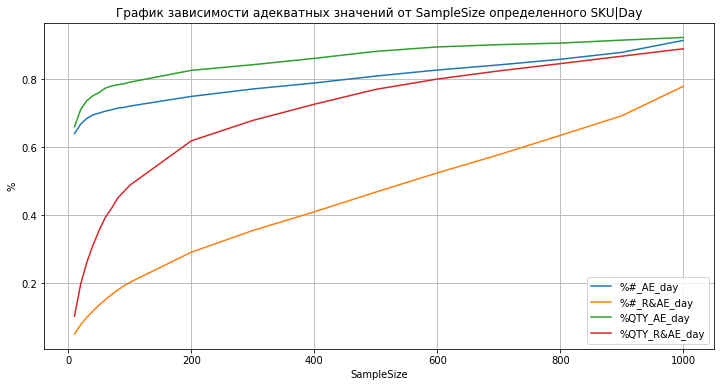

In [30]:
ae_stats_day = ['%#_AE_day', '%#_R&AE_day', '%QTY_AE_day', '%QTY_R&AE_day']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Day')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_day:
    ax.plot(adeq_day.SampleSize, adeq_day[ae_stat], label=ae_stat)
    ax.legend()

In [31]:
adeq_week = sample_data_week.groupby(['SampleSize']).mean()

adeq_week.reset_index(inplace=True)

adeq_week.rename(columns={'flag_AE' : '%#_AE_week', 
                          'flag_R&AE' : '%#_R&AE_week'}, inplace=True)
adeq_week['%QTY_AE_week'] = adeq_week['QTY_AE_week'] / adeq_week['Qty']
adeq_week['%QTY_R&AE_week'] = adeq_week['QTY_R&AE_week'] / adeq_week['Qty']

columns_drop = ['SKU', 'Store', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_week', 'QTY_R&AE_week']
adeq_week.drop(columns_drop, axis=1, inplace=True)

In [32]:
adeq_week

,SampleSize,Elasticity,Qty,Num_diff_prices,%#_AE_week,%#_R&AE_week,%QTY_AE_week,%QTY_R&AE_week
0,10,-0.408173,2.879180,6.118452,0.671620,0.101581,0.728011,0.233334
1,20,-0.335078,5.148476,9.523594,0.707906,0.171988,0.773084,0.394755
2,30,-0.348604,7.347778,12.122160,0.731782,0.225537,0.807119,0.493524
3,40,-0.331182,9.728798,14.345735,0.750182,0.274028,0.824498,0.562389
4,50,-0.352452,12.226802,16.362040,0.764790,0.314609,0.836441,0.605618
5,60,-0.358144,14.850922,18.277504,0.777341,0.350612,0.849406,0.642979
6,70,-0.387135,17.918674,20.218351,0.794277,0.392738,0.868568,0.684911
7,80,-0.399548,21.347496,22.109293,0.809005,0.432845,0.882434,0.719406
8,90,-0.416217,25.313808,23.972980,0.823251,0.472748,0.889083,0.742289
9,100,-0.440906,30.049101,25.791669,0.833844,0.511644,0.894321,0.766347


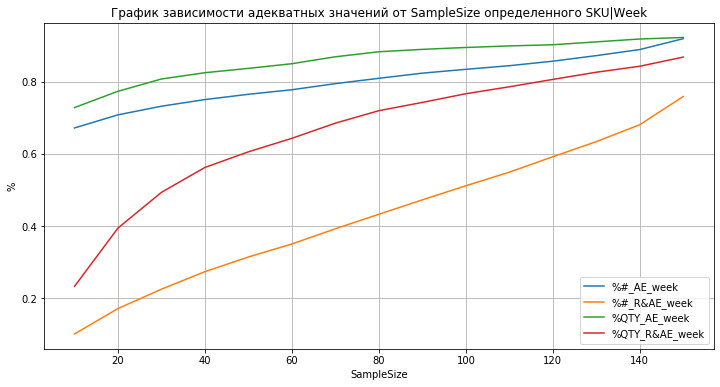

In [33]:
ae_stats_week = ['%#_AE_week', '%#_R&AE_week', '%QTY_AE_week', '%QTY_R&AE_week']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Week')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_week:
    ax.plot(adeq_week.SampleSize, adeq_week[ae_stat], label=ae_stat)
    ax.legend()

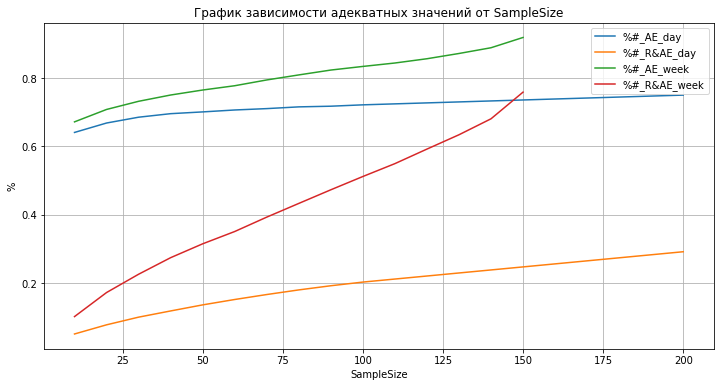

In [34]:
ae_stats_day = ['%#_AE_day', '%#_R&AE_day']
ae_stats_week = ['%#_AE_week', '%#_R&AE_week']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_day:
    ax.plot(adeq_day[:11].SampleSize, adeq_day[:11][ae_stat], label=ae_stat)
    ax.legend()

for ae_stat in ae_stats_week:
    ax.plot(adeq_week.SampleSize, adeq_week[ae_stat], label=ae_stat)
    ax.legend()